## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction
 

For this project, we analyse the results of an A/B test run by an e-commerce website.  The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Our aim is to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision. 

#### Part I - Probability

We import our required libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Next, we read in the dataset and take a look at the top 5 rows.

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. Find the number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. Find the proportion of users converted.

In [5]:
(df.query('converted==1').shape[0])/(df.shape[0])

0.11965919355605512

e. We find the number of times the `new_page` and `treatment` don't line up.

In [6]:
num1=df.query("landing_page=='new_page' and group!='treatment'").shape[0] #number of lines which include new_page but not treatment
num2=df.query("landing_page!='new_page' and group=='treatment'").shape[0] #number of lines which include treatment but not new_page
num_total=num1+num2
num_total

3893

f. We check if any of the rows have missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  We therefore remove these rows from our dataset.
The resulting new dataframe is **df2**.

In [9]:
df1 = df.drop(df[(df.landing_page=='new_page') & (df.group!='treatment')].index)
df1 = df.drop(df[(df.landing_page!='new_page') & (df.group=='treatment')].index)

In [10]:
df2 = df1.drop(df1[(df1.landing_page=='old_page') & (df1.group!='control')].index)
df2 = df1.drop(df1[(df1.landing_page!='old_page') & (df1.group=='control')].index)

In [11]:
df2.shape

(290585, 5)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Analysis of **df2**

a. Number of unique **user_id**s in **df2**

In [13]:
df2['user_id'].nunique()

290584

b. We identify the **user_id** repeated in **df2**.

In [14]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. We find the row information for the repeat **user_id**

In [15]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. We remove **one** of the rows with a duplicate **user_id** from **df2**.

In [16]:
df2=df2.drop(2893)

In [17]:
df2[df2['user_id']==773192] #check to see if the user_id is no longer repeated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0




a. Probability of an individual converting regardless of the page they receive.

In [18]:
(df2.query('converted==1').shape[0])/(df2.shape[0])

0.11959708724499628

b. Probability that an individual in the `control` group converted

In [19]:
control_total = df2.query('group=="control"').shape[0] #total individuals in control group
control_converted = df2.query('group=="control" and converted==1').shape[0] #individuals in control group who converted
prob_control_converted = control_converted/control_total
prob_control_converted

0.1203863045004612

c. Probability that an individual in the `treatment` group converted

In [20]:
treatment_total = df2.query('group=="treatment"').shape[0] #total individuals in treatment group
treatment_converted = df2.query('group=="treatment" and converted==1').shape[0] #individuals in treatent group who converted
prob_treatment_converted = treatment_converted/treatment_total
prob_treatment_converted

0.11880806551510564

d. Probability that an individual received the new page

In [21]:
(df2.query('landing_page=="new_page"').shape[0])/(df2.shape[0])

0.5000619442226688

**Thus the proportion of individuals receiving the new page or the old page are fairly equal in number.**

**We have analysed the probability of individuals converting in both the groups. In the control group, the probability that the individual converted is 12.03%, whereas in the treatment group, the probability that an individual converted is 11.88%. As the treatment group probability is slightly less than the control group probability, we do not find sufficient evidence to  say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

We need to make the decision on which page is better just based on all the data provided. We would like to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, therefore our null and alternative hypothesis are as follows:

**$H_{0}$ :  $p_{new}$ - $p_{old}$  ≤ 0**

**$H_{1}$ :  $p_{new}$ - $p_{old}$  > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

We perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. The **convert rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. The **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = p_new
p_old

0.11959708724499628

c. Find $n_{new}$

In [24]:
n_new = df2.query('landing_page== "new_page"').shape[0]
n_new

145310

d. Find $n_{old}$

In [25]:
n_old = df2.query('landing_page== "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
 new_page_converted = np.random.choice([1,0],size=n_new,replace=True,p=[p_new,(1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([1,0],size=n_old,replace=True,p=[p_old,(1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for our simulated values from part (e) and (f).

In [28]:
observed_diffs = new_page_converted.mean() - old_page_converted.mean()
observed_diffs

-0.003305785175644879

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one we calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0],size=n_new,replace=True,p=[p_new,(1-p_new)])
    old_page_converted = np.random.choice([1,0],size=n_old,replace=True,p=[p_old,(1-p_old)]) 
    observed_diffs = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(observed_diffs)

In [30]:
# convert to numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

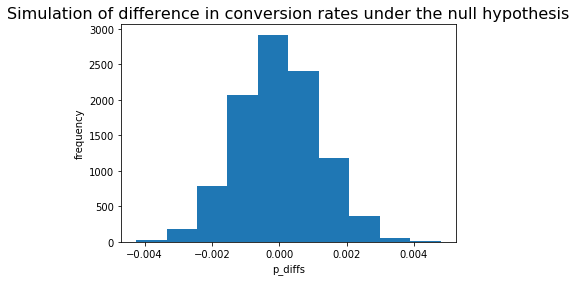

In [31]:
plt.hist(p_diffs)
plt.title('Simulation of difference in conversion rates under the null hypothesis',fontsize=16);
plt.xlabel('p_diffs');
plt.ylabel('frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
actual_diffs = prob_treatment_converted - prob_control_converted
actual_diffs

-0.0015782389853555567

In [33]:
(p_diffs > actual_diffs).mean()

0.9061

**Thus the p-value is calculated as 0.9065, which is much greater than our  $\alpha$ value of 0.05 . (An $\alpha$ level of 0.05 indicates that we have a 5% chance of committing a Type I error if the null is true.) Therefore, in this case we fail to reject the null hypothesis. We can conclude that there is not sufficient evidence to prove that that new page performs better than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
convert_old = df2.query('landing_page=="old_page" and converted==1').shape[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').shape[0]
print("convert_old = ",format(convert_old))
print("convert_new = ",format(convert_new))

convert_old =  17489
convert_new =  17264


In [36]:
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]
print("n_old = ",format(n_old))
print("n_new = ",format(n_new))

n_old =  145274
n_new =  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')

In [43]:
z_score

-1.3109241984234394

In [44]:
p_value

0.9050583127590245

**We had picked a significance level of 95% for the test. Since this is a test for the difference, it's a two-tail test so a z-score past -1.96 or 1.96 will be significant. Our z-score is found to be -1.3109 which is not significant at this level, and the p-value is found to be larger than 0.05 . We thus fail to reject the null hyposthesis, which is consistent with our findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. We use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  We first create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
df2['intercept'] = 1
df2[['old_page','ab_page']] =pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import our regression model.  Instantiate the model, and fit the model using the two columns we created in part **b.** to predict whether or not an individual converts.

In [271]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of our model below.

In [272]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        21:42:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. The p-value is now 0.190 which is greater than the $\alpha$ level of 0.05. It's a two-tail test so a z-score past -1.96 or 1.96 will be significant. Our z-score is found to be -1.3109 which is not significant at this level, we thus still fail to reject the null hyposthesis,

**Since this is a two sided test, the hypothesis are now as follows:**

**$H_{0}$ :  $p_{new}$ - $p_{old}$  = 0**

**$H_{1}$ :  $p_{new}$ - $p_{old}$  != 0**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We have not taken all factors that influence conversion rates into account while performing the test. There are different factors like category of students, new or returning students, age, economic factors etc which play a role in impacting the decisions. However, it is not possible to take all factors into account in a regression model, as all factors cannot be accurately determined in practice and is also likely to make the model more complicated.

g. Now along with testing if the conversion rate changes for different pages, we also add an effect based on which country a user lives to determine if country had an impact on conversion. We read in the **countries.csv** dataset and merge together our datasets on the approporiate rows.  

We create dummy variables for these country columns.

In [261]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,old_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1


In [262]:
### Check the number of countries in the dataset.
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [263]:
### Create the necessary dummy variables
df_new[['US','UK','CA']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,old_page,US,UK,CA
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,1,0


In [264]:
### Fit Your Linear Model And Obtain the Results
logitc = sm.Logit(df_new['converted'],df_new[['intercept','UK','CA']])

In [265]:
results = logitc.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        21:26:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Results** The p-values for the countries are found to be above 0.05 . Therefore we fail to reject the null, and conclude that other factors being constant, the country of the user does not have an impact on the conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [267]:
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,old_page,US,UK,CA,CA_page,UK_page
user_id,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,1,0,0,0


In [268]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','CA' ,'UK_page','CA_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:               3.482e-05
Time:                        21:29:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0715      0.037    -55.798      0.000      -2.144      -1.999
ab_page        0.0674      0.052      1.297      0.195      -0.034       0.169
UK             0.0901      0.040      2.225      0.026       0.011       0.169
CA             0.0644      0.038      1.679      0.093      -0.011       0.140
UK_page       -0.0783      0.057     -1.378      0.168      -0.190       0.033
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""


Results: The p-values are much larger than 0.05 in each case. Therefore, we  again fail to reject the null, and conclude that there is not sufficient evidence to prove an interaction exists between country and page received.

**We thus fail to reject the null hypothesis after A/B testing.  In conclusion, we can say that we do not have sufficient evidence to suggest that the new page results in more number of conversions in comparison to the old page.**

### Resources used for reference:

https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression